# Trajectory Open Data Example

In [ ]:
import numpy as np

n = 10
lons = np.linspace(0, 5*360, n)
lats = np.linspace(-85, 85, n)
linspace = np.stack([lats, lons], axis=1)
pts = linspace.tolist()

import earthkit.data

request = {
    "class": "ai",
    "stream" : "oper",
    "type" : "fc",
    "date" : -1,
    "time" : "0000",
    "levtype" : "sfc",
    "expver" : "0001", 
    "model": "aifs-single",
    "domain" : "g",
    "param" : "166/167/169",
    "step" : "0",
    "feature" :{ 
        "type" : "trajectory", 
        "points" : [[0,0],[10,10],[20,20], [30,30], [30, 50], [50, 10]],#pts, 
        "inflation" : 0.5, 
        "inflate" : "round",
        "axes" :["latitude", "longitude"], 
    },
}

ds = earthkit.data.from_source("polytope", "ecmwf-mars", request, stream=False, address='polytope.ecmwf.int')

## Convert to xarray

In [23]:
da = ds.to_xarray()
da

<xarray.Dataset> Size: 80kB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 1254)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2025-02-24T00:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) int64 8B 0
  * points     (points) int64 10kB 0 1 2 3 4 5 ... 1248 1249 1250 1251 1252 1253
    x          (points) float64 10kB -0.4215 -0.4215 -0.4215 ... 50.16 50.44
    y          (points) float64 10kB 0.0 0.2812 359.7 0.0 ... 10.0 10.42 10.0
    level      (points) float64 10kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    time       (points) int64 10kB 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
Data variables:
    10v        (datetimes, number, steps, points) float64 10kB 0.4052 ... 1.475
    2t         (datetimes, number, steps, points) float64 10kB 298.6 ... 277.1
    ssrd       (datetimes, number, steps, points) float64 10kB 0.0 0.0 ... 0.0
Attributes:
    class:          ai
    Forecast date:  2025-02-24T00:00:00Z
    domain:         g
    expver:         0102
    levtype:        sfc
    model:          aifs-single
    step:           0
    stream:         oper
    type:           fc
    number:         0

# Visualise

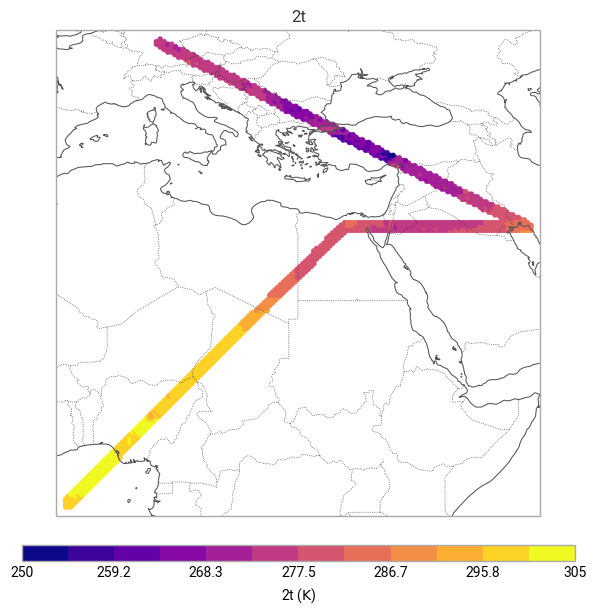

In [24]:
import earthkit.plots

chart = earthkit.plots.Map()
chart.point_cloud(da['2t'], x="y", y="x")
chart.coastlines()
chart.borders()
chart.title("{variable_name}")
chart.legend()
chart.show()